# Traffic accidents

In [21]:
mu <- seq(0, 10, 0.01)
alpha <- 6.25
lambda <- 2.5
trapez <- function(mu) {
    val <- rep(0, length(mu))
    for (i in 1:length(mu)) {
        if (mu[i] <= 2) {
            val[i] <- mu[i]/10
        } else if (mu[i] > 2 && mu[i] <= 4) {
            val[i] <- .2
        } else if (mu[i] > 4 && mu[i] < 8) {
            val[i] <- -0.05 * mu[i] + 0.4
        } else {
            val[i] <- 0
        }
    }
    return(val)
}

prior1 <- dunif(mu, 0, 10)
prior2 <- 1 / sqrt(mu)/10
prior3 <- dgamma(mu, alpha, lambda)
prior4 <- trapez(mu)

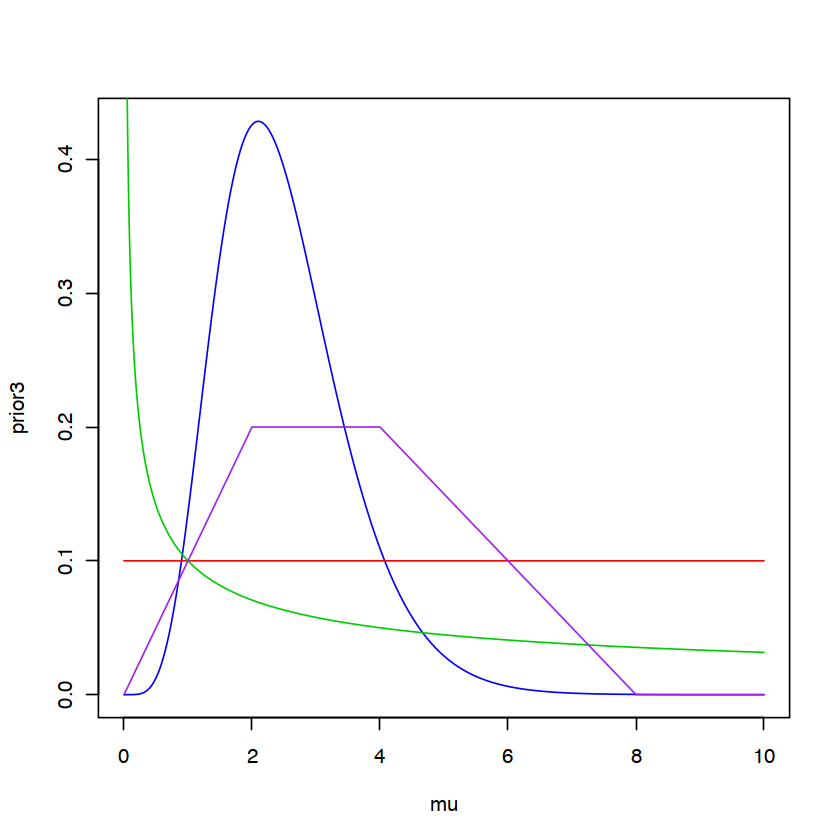

In [22]:
plot(mu, prior3, type = 'l', col = 'blue')
lines(mu, prior1, col = 'red')
lines(mu, prior2, col = 'green3')
lines(mu, prior4, col = 'purple')

In [33]:
y <- c(3, 2, 0, 8, 2, 4, 6, 1)
sum_y <- sum(y)

posterior1 <- dgamma(mu, sum_y + 1, length(y))
posterior2 <- dgamma(mu, sum_y + 0.5, length(y))
posterior3 <- dgamma(mu, alpha + sum_y, lambda + length(y))
posterior4 <- dgamma(mu, sum_y + 1, length(y)) * prior4 / integrate(function(mu) trapez(mu)*dgamma(mu, sum_y + 1, length(y)), 0, 10)$value

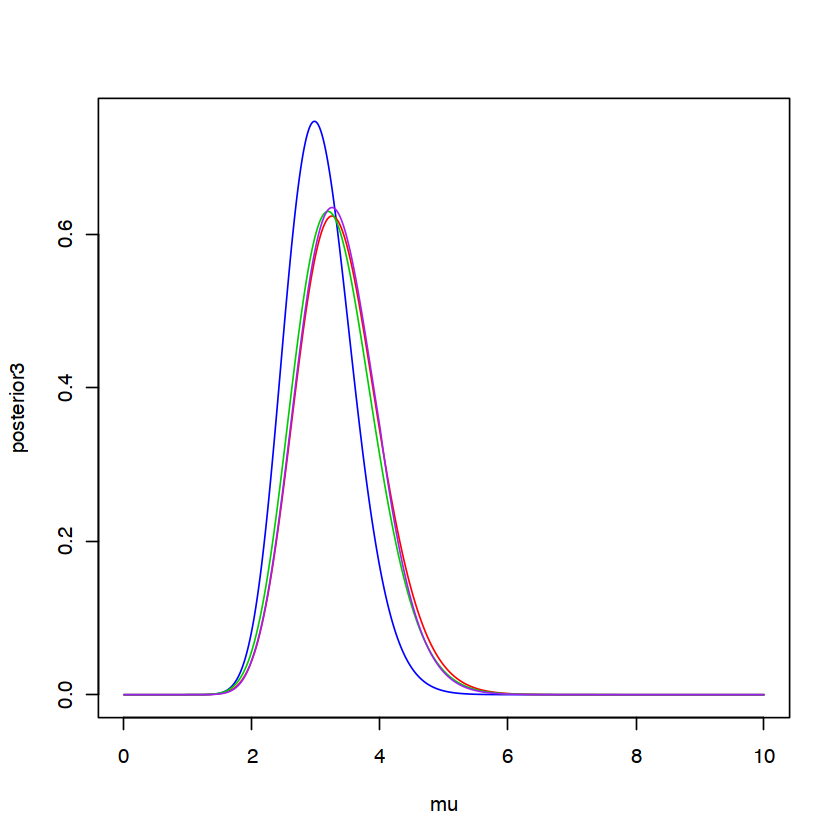

In [34]:
plot(mu, posterior3, type = 'l', col = 'blue')
lines(mu, posterior1, col = 'red')
lines(mu, posterior2, col = 'green3')
lines(mu, posterior4, col = 'purple')

In [42]:
cumul1 <- pgamma(mu, sum_y + 1, length(y))

for(i in 1:length(cumul1)){
    min <- max(mu[cumul1 <= 0.025])
    max <- min(mu[cumul1 >= 0.975])
}
min
max

integrate(function(mu) dgamma(mu, sum_y + 1, length(y))*mu, 0, 10)$value

[1] 2.22

[1] 4.77

[1] 3.375

# Lighthouse

In [12]:
beta_true <- 
alpha_true <- 1
x <- -2:2
n_sample <- 200
n_plot <- c(1, 2, 5, 10, 20, 50, 100)
alpha <- seq(-6, 6, length.out = n_sample)
tan_theta <- runif(n_sample, -3, 1)

In [2]:
log_posterior <- function(a, data){
    logL <- 0
    for(x in data){
        logL <- logL - log(1 + ((x - a)/beta_true)^2)
    }
    return(logL)
}

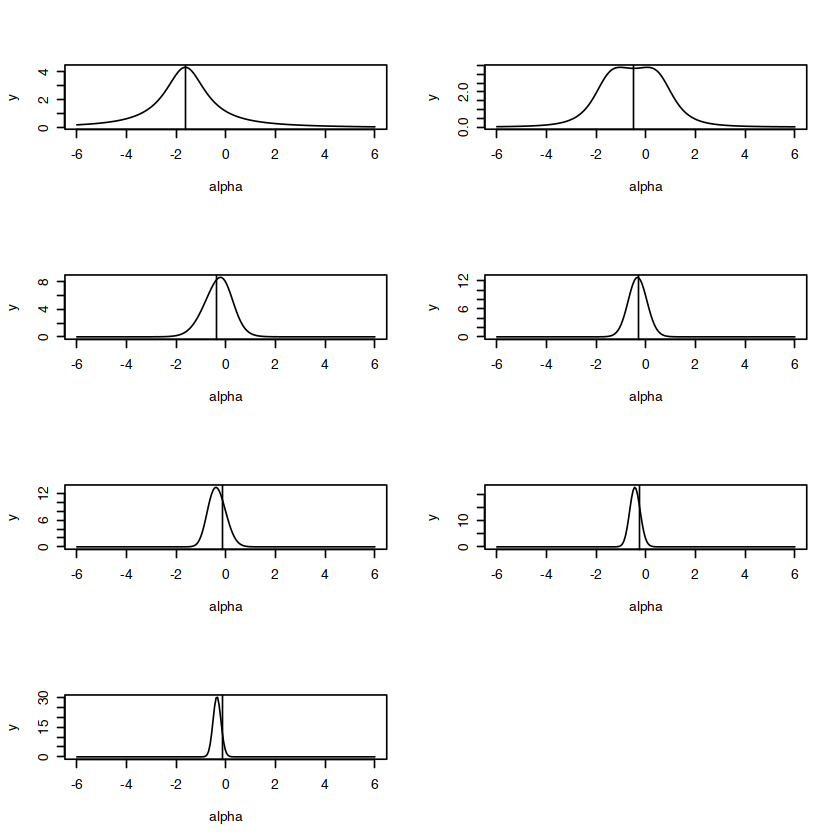

In [23]:
data <- beta_true * tan_theta + alpha_true
par(mfrow = c(4, 2))
for(n in n_plot){
    dt <- data[1:n]
   
    # get loglikelihood (log posterior)
    y_log <- log_posterior(alpha, dt)
    alpha_max <- alpha[which.max(y_log)]

    # get the exponential
    y <- exp(y_log)/sum(1/n_sample * exp(y_log))
    plot(alpha, y, type = 'l')
    abline(v = mean(dt))
}